In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2",low_memory=False)
df = df[["iyear","country_txt","imonth","nkill","gname","weaptype1_txt"]]

In [3]:
df.tail(3)

,iyear,country_txt,imonth,nkill,gname,weaptype1_txt
181688,2017,Philippines,12,0.0,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,India,12,0.0,Unknown,Explosives
181690,2017,Philippines,12,0.0,Unknown,Explosives


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   iyear          181691 non-null  int64  
 1   country_txt    181691 non-null  object 
 2   imonth         181691 non-null  int64  
 3   nkill          171378 non-null  float64
 4   gname          181691 non-null  object 
 5   weaptype1_txt  181691 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.3+ MB


In [5]:
df.columns

Index(['iyear', 'country_txt', 'imonth', 'nkill', 'gname', 'weaptype1_txt'], dtype='object')

In [6]:
data_2000_2017 = df.loc[df["iyear"]>=2000]

In [7]:
data_2000_2017.head(3)

,iyear,country_txt,imonth,nkill,gname,weaptype1_txt
69835,2000,Namibia,1,0.0,National Union for the Total Independence of A...,Firearms
69836,2000,Namibia,1,0.0,National Union for the Total Independence of A...,Firearms
69837,2000,India,1,1.0,Lashkar-e-Taiba (LeT),Firearms


In [8]:
killed_per_country = df.groupby("country_txt",as_index=False)["nkill"].sum()

In [9]:
killed_per_country = killed_per_country.sort_values("nkill",ascending=False).iloc[0:15,:]

In [10]:
killed_per_country.head(3)

,country_txt,nkill
84,Iraq,78589.0
0,Afghanistan,39384.0
134,Pakistan,23822.0


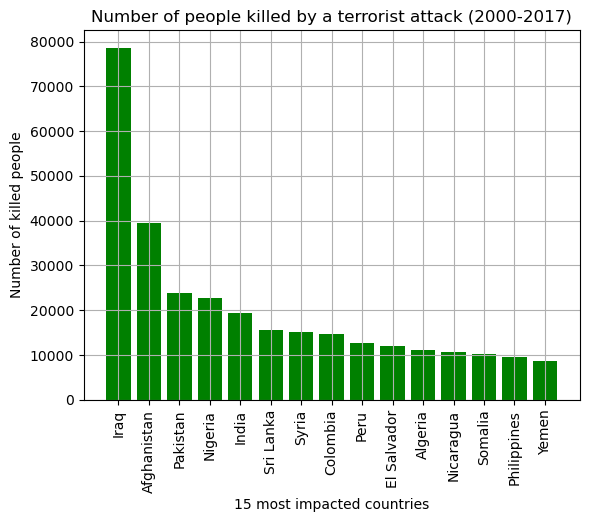

In [11]:
plt.bar(killed_per_country.country_txt,killed_per_country.nkill,color="g")
plt.title("Number of people killed by a terrorist attack (2000-2017)")
plt.xlabel("15 most impacted countries")
plt.ylabel("Number of killed people")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [12]:
killed_by_year = df.groupby("iyear",as_index=False)["nkill"].sum()

In [13]:
killed_by_year.head(5)

,iyear,nkill
0,1970,174.0
1,1971,173.0
2,1972,566.0
3,1973,370.0
4,1974,539.0


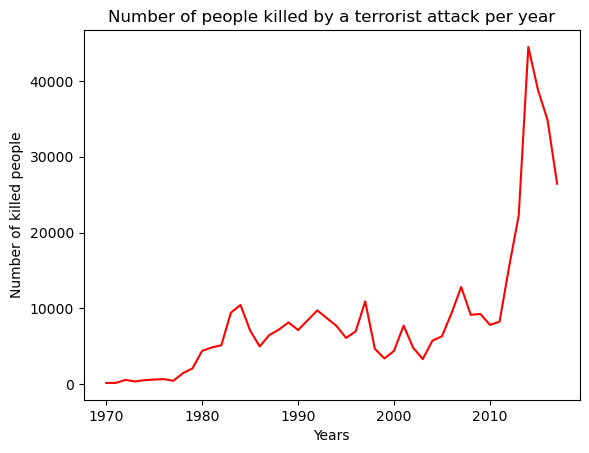

In [14]:
plt.plot(killed_by_year.iyear,killed_by_year.nkill,color="r")
plt.title("Number of people killed by a terrorist attack per year")
plt.xlabel("Years")
plt.ylabel("Number of killed people")
plt.show()

In [15]:
all_attacks_occurence = df.groupby("country_txt",as_index=False).size().sort_values("size",ascending=False).iloc[0:15,:]

In [16]:
all_attacks_occurence.head(3)

,country_txt,size
84,Iraq,24636
134,Pakistan,14368
0,Afghanistan,12731


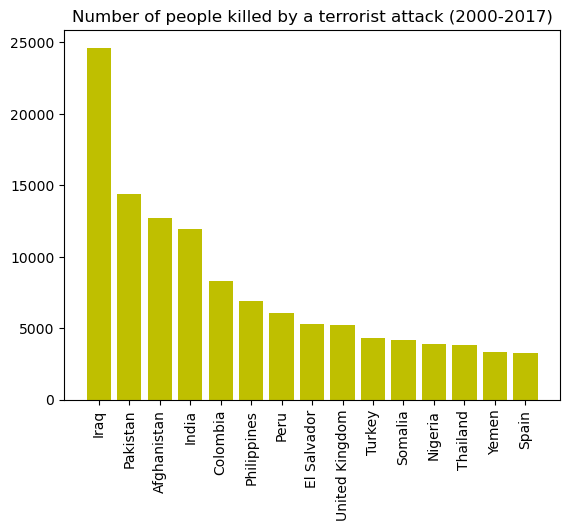

In [17]:
plt.bar(all_attacks_occurence.country_txt,all_attacks_occurence["size"],color="y")
plt.title("Number of people killed by a terrorist attack (2000-2017)")
plt.xticks(rotation=90)
plt.show()

In [18]:
attacks_by_group = df.groupby("gname",as_index=False).size().sort_values("size",ascending=False).iloc[0:15,:]

In [19]:
attacks_by_group.head(3)

,gname,size
3408,Unknown,82782
3138,Taliban,7478
1535,Islamic State of Iraq and the Levant (ISIL),5613


In [20]:
attacks_by_group = attacks_by_group[attacks_by_group.gname!="Unknown"]

In [21]:
attacks_by_group.head(3)

,gname,size
3138,Taliban,7478
1535,Islamic State of Iraq and the Levant (ISIL),5613
2948,Shining Path (SL),4555


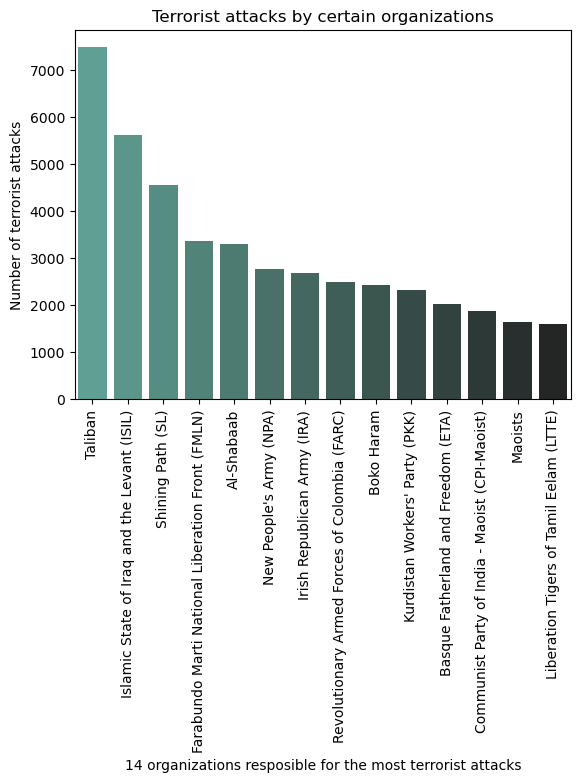

In [22]:
sns.barplot(x=attacks_by_group.gname,y=attacks_by_group["size"],palette="dark:#5A9_r")
plt.title("Terrorist attacks by certain organizations")
plt.xlabel("14 organizations resposible for the most terrorist attacks")
plt.ylabel("Number of terrorist attacks")
plt.xticks(rotation=90)
plt.show()

In [23]:
attacks_by_weapon = df.groupby("weaptype1_txt",as_index=False).size().sort_values("size",ascending=False).iloc[0:15,:]

In [24]:
attacks_by_weapon.head(5)

,weaptype1_txt,size
2,Explosives,92426
4,Firearms,58524
10,Unknown,15157
5,Incendiary,11135
6,Melee,3655


In [25]:
attacks_by_weapon = attacks_by_weapon.iloc[0:6,:]

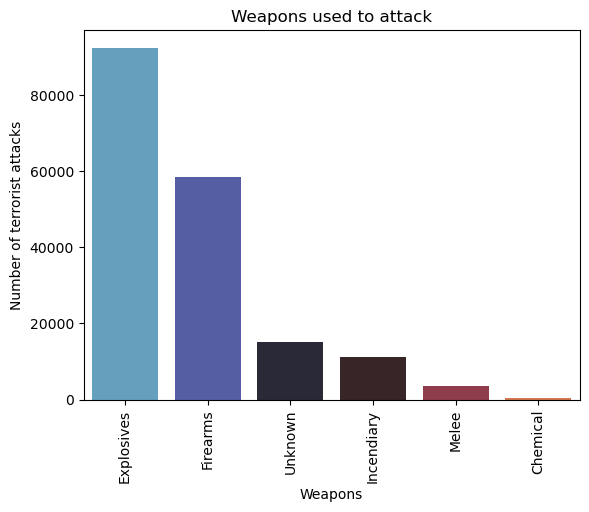

In [26]:
sns.barplot(x=attacks_by_weapon.weaptype1_txt,y=attacks_by_weapon["size"],palette="icefire")
plt.xticks(rotation=90)
plt.title("Weapons used to attack")
plt.xlabel("Weapons")
plt.ylabel("Number of terrorist attacks")
plt.show()

In [27]:
killed_by_month = df.groupby("imonth",as_index=False)["nkill"].sum()

In [28]:
killed_by_month.tail(3)

,imonth,nkill
10,10,35174.0
11,11,31054.0
12,12,30976.0


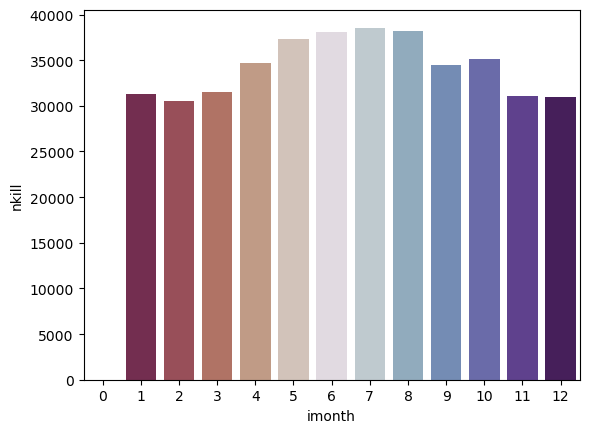

In [39]:
sns.barplot(x=killed_by_month.imonth,y=killed_by_month.nkill,palette='twilight_shifted_r')
plt.title("Number of people killed (by month)")
plt.xlable("Months")
plt.ylable("Number oof people killed")
plt.show()